# Optymalizacja wielokryterialna

Notebook pokazuje przykład działania algorytmu NSGA-II na benchmarku ZDT3.

Literatura dodatkowa:

[1] E. Zitzler, K. Deb, L. Thiele, Comparison of Multiobjective Evolutionary Algorithms: Empirical Results, Evolutionary Computation, vol 8, no 2, 2000, pp. 173-195. [http://www.tik.ee.ethz.ch/sop/publicationListFiles/zdt2000a.pdf]

[2] Multi-objective Benchmark Problems. [http://www.tik.ee.ethz.ch/sop/download/supplementary/testproblems/]

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Działanie NSGA-II na ZDT3

### Problem ZDT3

Problem ZDT3 to dość popularny problem testowy dla optymalizacji wielokryterialnej.

Przestrzeń poszukiwań: $\Omega = [0, 1]^d$.

Dwa kryteria (oba minimalizujemy):

$$f_1(\mathbf{x}) = x_1,$$

$$f_2(\mathbf{x}) = g(\mathbf{x}) [1 - \sqrt{x_1 / g(\mathbf{x})} - x_1 / g(\mathbf{x}) \sin(10 \pi x_1)],$$
gdzie $g(\mathbf{x}) = 1 + \frac{9}{d-1}\sum_{i=2}^d x_i$.

### Dokładny front Pareto dla ZDT3

Znane są wzory na dokładny front Pareto dla ZDT3 (patrz [1] lub [2]).

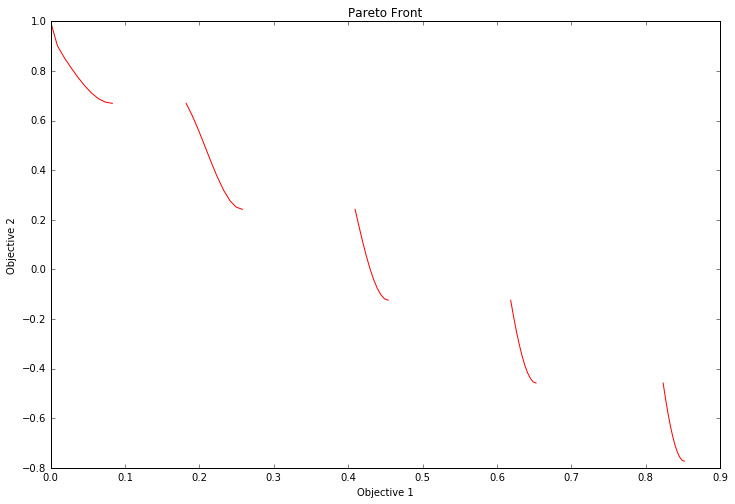

In [2]:
F = np.array([[0.0000000000, 0.0830015349],
              [0.1822287280, 0.2577623634],
              [0.4093136748, 0.4538821041],
              [0.6183967944, 0.6525117038],
              [0.8233317983, 0.8518328654]])

r = 10
X = (np.tile(np.linspace(0, 1, r), [F.shape[0], 1]) * (F[:, 1] - F[:, 0])[np.newaxis].T + F[:, 0][np.newaxis].T)
Y = 1 - np.sqrt(X) - X * np.sin(10 * np.pi * X)

plt.figure(figsize=(12, 8))
for i in xrange(F.shape[0]):
    plt.plot(X[i, :].ravel(), Y[i, :].ravel(), 'r-')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Pareto Front')
plt.show()

### Wyznaczanie frontu Pareto algorytmem NSGA-II

In [3]:
import sys

sys.path.append('/home/piotr/NSGA2')

from metrics.problems.zdt import ZDT3Metrics
from nsga2.evolution import Evolution
from nsga2.problems.zdt import ZDT
from nsga2.problems.zdt.zdt3_definitions import ZDT3Definitions

def print_statistics(population, iteration):
    PF = population.fronts[0]
    metrics = ZDT3Metrics()
    print("Iteration %03d: HV = %0.2f, HVR = %0.2f" % (iteration, metrics.HV(PF), metrics.HVR(PF)))

statistics = {}
def log_statistics(population, iteration):
    ranks = [individual.rank for individual in population]
    crowding_distances = [individual.crowding_distance for individual in population]
    objectives = [individual.objectives for individual in population]

    pareto_front = population.fronts[0]
    metrics = ZDT3Metrics()
    hv = metrics.HV(pareto_front)
    hvr = metrics.HVR(pareto_front)

    statistics[iteration] = hv, hvr, ranks, crowding_distances, objectives

solver = Evolution(ZDT(ZDT3Definitions()), 200, 250)
solver.register_on_new_generation(print_statistics)
solver.register_on_new_generation(log_statistics)
results = solver.evolve()

Iteration 000: HV = 80.63, HVR = 0.63
Iteration 001: HV = 80.24, HVR = 0.62
Iteration 002: HV = 81.13, HVR = 0.63
Iteration 003: HV = 83.88, HVR = 0.65
Iteration 004: HV = 86.35, HVR = 0.67
Iteration 005: HV = 88.85, HVR = 0.69
Iteration 006: HV = 89.96, HVR = 0.70
Iteration 007: HV = 90.82, HVR = 0.71
Iteration 008: HV = 91.71, HVR = 0.71
Iteration 009: HV = 94.11, HVR = 0.73
Iteration 010: HV = 93.14, HVR = 0.72
Iteration 011: HV = 94.33, HVR = 0.73
Iteration 012: HV = 96.50, HVR = 0.75
Iteration 013: HV = 96.59, HVR = 0.75
Iteration 014: HV = 95.82, HVR = 0.74
Iteration 015: HV = 95.93, HVR = 0.74
Iteration 016: HV = 96.82, HVR = 0.75
Iteration 017: HV = 97.62, HVR = 0.76
Iteration 018: HV = 98.24, HVR = 0.76
Iteration 019: HV = 100.10, HVR = 0.78
Iteration 020: HV = 100.09, HVR = 0.78
Iteration 021: HV = 101.12, HVR = 0.79
Iteration 022: HV = 102.41, HVR = 0.80
Iteration 023: HV = 103.64, HVR = 0.80
Iteration 024: HV = 103.73, HVR = 0.81
Iteration 025: HV = 103.43, HVR = 0.80
Itera

### Wykres uzyskanego (ostatecznego) frontu Pareto

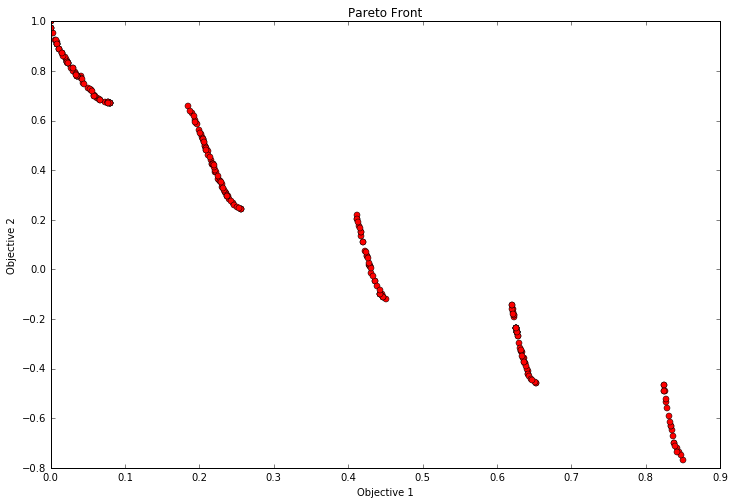

In [4]:
PF = np.array([i.objectives for i in results])

plt.figure(figsize=(12, 8))
plt.plot(PF[:, 0], PF[:, 1], 'ro')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Pareto Front')
plt.show()

### Wykres HV i HVR

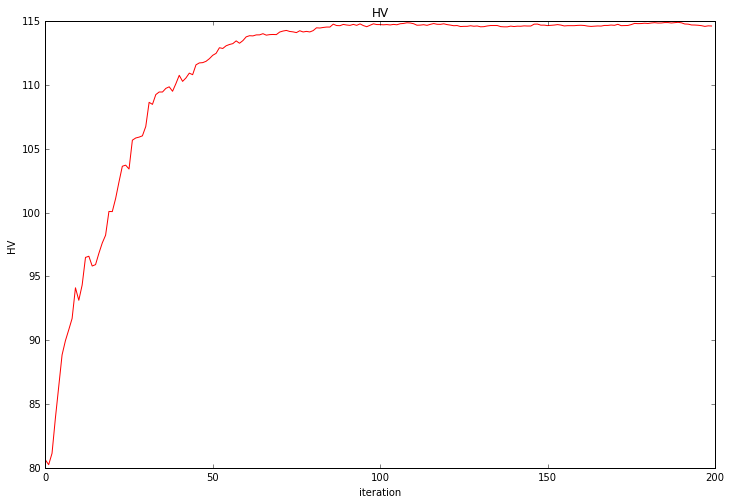

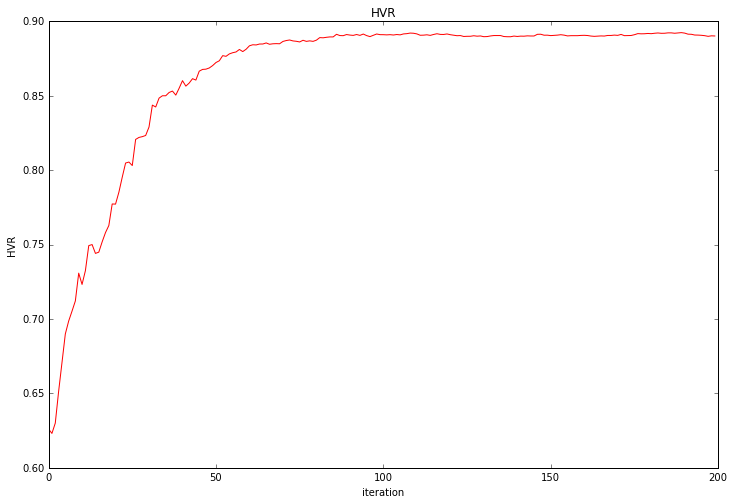

In [5]:
HV = np.array([statistics[i][0] for i in xrange(len(statistics))])
HVR = np.array([statistics[i][1] for i in xrange(len(statistics))])

plt.figure(figsize=(12, 8))
plt.plot(HV, 'r-')
plt.xlabel('iteration')
plt.ylabel('HV')
plt.title('HV')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(HVR, 'r-')
plt.xlabel('iteration')
plt.ylabel('HVR')
plt.title('HVR')
plt.show()

### Wykres przykładowej populacji (ze wskazanej iteracji)

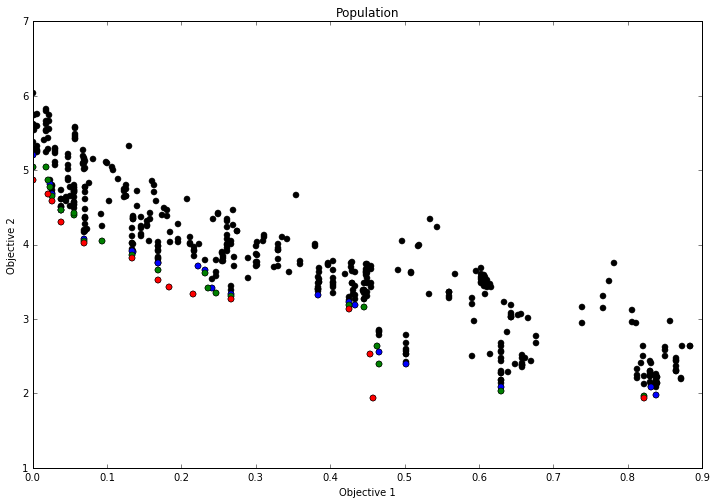

In [6]:
iteration = 1 # len(statistics)-1

ranks = np.array(statistics[iteration][2])
objectives = np.array(statistics[iteration][4])

PF0 = (ranks == 0)
PF1 = (ranks == 1)
PF2 = (ranks == 2)

plt.figure(figsize=(12, 8))
plt.plot(objectives[:, 0], objectives[:, 1], 'ko')
plt.plot(objectives[PF2, 0], objectives[PF2, 1], 'bo')
plt.plot(objectives[PF1, 0], objectives[PF1, 1], 'go')
plt.plot(objectives[PF0, 0], objectives[PF0, 1], 'ro')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Population')
plt.show()